In [1]:
from sklearn import datasets
import numpy as np 
import matplotlib.pyplot as plt

iris = datasets.load_iris()

In [2]:
%matplotlib inline
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [18]:
def DBSCAN(X, epsilon=0.6, MinPts=8):
#     def preproduce(X):
#         return (X - np.min(X, axis=0))/ (np.max(X, axis=0)- np.min(X, axis=0))
#     X = preproduce(X)
    Nx = [0 for i in range(len(X))] 
    core_points = []
    for i, xi in enumerate(X):
        temp = np.array([np.linalg.norm(xi - cj) if i != j else np.inf for j, cj in enumerate(X)])
        Nx[i] =  set(np.where(temp < epsilon)[0])
        if len(Nx) >= MinPts:
            core_points.append(i)
    k = 0
    not_visited = set([i for i in range(len(X))])
    
    Ck = [0 for i in range(len(X))] 
    if len(core_points) == 0:
        print("Not core_points")
    while len(core_points) > 0:
        not_visited_temp = not_visited
        
        o = core_points[np.random.randint(0, len(core_points))]
        Queue = [o]
        not_visited = not_visited - set(Queue)
        
        while len(Queue) > 0:
            q = Queue[0]
            Queue = Queue[1:]
            
            if len(Nx[q]) >= MinPts:
                delta = Nx[q] & not_visited
                Queue = Queue + list(delta)
                not_visited = not_visited - delta
        Ck[k] = not_visited_temp - not_visited
        core_points = list(set(core_points) - Ck[k])
        k += 1
    Ans = np.zeros(len(X))
    for k_i in range(k):
        Ans[list(Ck[k_i])] = k_i
    return Ans

In [19]:
test_y = DBSCAN(iris.data,)

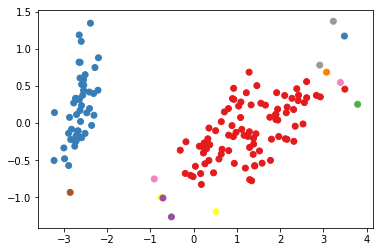

In [20]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components=2).fit_transform(iris.data)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=test_y, cmap=plt.cm.Set1)

In [21]:
def evaluate(y, t):
    a, b, c, d = [0 for i in range(4)]
    for i in range(len(y)):
        for j in range(i+1, len(y)):
            if y[i] == y[j] and t[i] == t[j]:
                a += 1
            elif y[i] == y[j] and t[i] != t[j]:
                b += 1
            elif y[i] != y[j] and t[i] == t[j]:
                c += 1
            elif y[i] != y[j] and t[i] != t[j]:
                d += 1
    return a, b, c, d

def external_index(a, b, c, d, m):
    JC = a / (a + b + c)
    FMI = np.sqrt(a**2 / ((a + b) * (a + c)))
    RI = 2 * ( a + d ) / ( m * (m + 1) )
    return JC, FMI, RI

def evaluate_it(y, t):
    a, b, c, d = evaluate(y, t)
    return external_index(a, b, c, d, len(y))

In [22]:
evaluate_it(iris.target, test_y)

(0.5478865703584804, 0.716364224913396, 0.7629139072847683)